3. DATA PREPARATION


Importing relevant libraries

In [78]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from string import punctuation

nltk.download('stopwords')
#warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/ian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loading the Dataset

In [79]:
df=pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')#since the default encoding used by pandas(utf-8) could not decode the byte in the csv filr
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [80]:
#Checking the Dataset status
class DataFrameChecker:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_info(self):
        print("DataFrame Info:")
        self.dataframe.info()

    def check_shape(self):
        print(f"DataFrame Shape: {self.dataframe.shape}")

    def check_describe(self):
        print("DataFrame Description:")
        print(self.dataframe.describe())
    def check_nulls(self):
        print("Null Values in DataFrame:")
        print(self.dataframe.isnull().sum())

    def check_duplicates(self):
        duplicate_rows = self.dataframe[self.dataframe.duplicated()]
        print(f"Number of Duplicate Rows: {duplicate_rows.shape[0]}")
        if duplicate_rows.shape[0] > 0:
            print("Duplicate Rows:")
            print(duplicate_rows)


    # Create an instance of DataFrameChecker
checker = DataFrameChecker(df)

    # Use the methods
print(checker.check_info())
print("---------------------------------------")
print(checker.check_shape())
print("---------------------------------------")
print(checker.check_describe())
print("---------------------------------------")
print(checker.check_nulls())
print("---------------------------------------")
print(checker.check_duplicates())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
---------------------------------------
DataFrame Shape: (9093, 3)
None
---------------------------------------
DataFrame Description:
                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                

3.1 Data Cleaning "emotion_in_tweet_is_directed_at" Column

In [81]:
df["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

Categorizing the brands to either Apple or Google products

In [82]:
product_category={
    "iPhone":"Apple", 
    "iPad":"Apple",
    "iPad or iPhone App":"Apple", 
    "Other Apple product or service": "Apple",
    "Android":"Google", 
    "Android App":"Google", 
    "Other Google product or service":"Google"
}
df["brand"]=df["emotion_in_tweet_is_directed_at"].replace(product_category)

               
print(df["brand"].value_counts())
print("---------------------------------------")
print(df.info())

brand
Apple     2409
Google     882
Name: count, dtype: int64
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 3   brand                                               3291 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB
None


Dealing with missing values in the brand column

In [83]:
filtered_df=df[df["brand"].isna()]
filtered_df.head(100)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,brand
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,NaN
6,NaN,NaN,No emotion toward brand or product,NaN
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product,NaN
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product,NaN
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product,NaN
...,...,...,...,...
186,Currently 150 people in line at the &quot;Pop ...,NaN,No emotion toward brand or product,NaN
187,Only iPad 2 available at #sxsw is the 64GB wif...,NaN,No emotion toward brand or product,NaN
188,÷¼ We love 2 entertain youÛ_Please donÛªt b...,NaN,No emotion toward brand or product,NaN
189,Less than 2 hours until we announce the detail...,NaN,No emotion toward brand or product,NaN


Dropping the 'emotion_in_tweet_is_directed_at' column since the 'brand' column is a replacement of it.

In [84]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 2   brand                                               3291 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From the filtered_df there are words in the tweet_text column that can help identify the brand.
For example, if the tweet_text contains the word "iPhone," it's likely an Apple brand. Similarly, if the tweet_text contains the word "Android," it's likely a Google brand.

In [85]:
class KeywordBrandAssigner:
    def __init__(self, keyword_to_brand):
        self.keyword_to_brand = keyword_to_brand  # Mapping from keywords to brands

    def assign_brands(self, df):
        for index, row in df.iterrows():
            text = row['tweet_text']
            if pd.isna(row['brand']) and isinstance(text, str):
                text_lower = text.lower()
                for keyword, brand in self.keyword_to_brand.items():
                    if keyword in text_lower:
                        df.at[index, 'brand'] = brand
                        break
        # Fill any remaining NaN values with 'Unknown'
        df['brand'] = df['brand'].fillna('Unknown')

# Example usage
keyword_to_brand = {
    'google': 'Google',
    'apple': 'Apple',
    'ipad': 'Apple',
    'itunes': 'Apple',
    'android': 'Google',
    'iphone': 'Apple'
}

assigner = KeywordBrandAssigner(keyword_to_brand)
assigner.assign_brands(df)


The KeywordBrandAssigner class maps specific keywords to their corresponding brands ("Apple" or "Google") based on the keyword_to_brand dictionary and assigns these brands to the 'brand' column of the DataFrame when a keyword is found in the tweet text. It ensures that any missing or unmatched values in the 'brand' column are filled with "Unknown.

In [86]:
#reloading the dataset
df["brand"].value_counts()

brand
Apple      5440
Google     2946
Unknown     707
Name: count, dtype: int64

Dropped the rows with unknown values since i'm focussed with tweets having information about either Google or Apple

In [87]:
#Dropping records with unknown values in the brand column
df.drop(df[df["brand"] == "Unknown"].index, inplace=True)
df["brand"].value_counts()

brand
Apple     5440
Google    2946
Name: count, dtype: int64

In [88]:
#Reloading the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8386 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8386 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8386 non-null   object
 2   brand                                               8386 non-null   object
dtypes: object(3)
memory usage: 262.1+ KB


Checking and Dropping of Duplicates

In [89]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print("---------------------------------------")
print(df.shape)

False    8366
True       20
Name: count, dtype: int64
---------------------------------------
(8366, 3)


In [90]:
df.duplicated().value_counts()

False    8366
Name: count, dtype: int64

#### 3.2 Data Cleaning "is there an emotion directed at a brand or product" column.

In [91]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    4688
Positive emotion                      2960
Negative emotion                       568
I can't tell                           150
Name: count, dtype: int64

There are 4 classifiers(no emotion,positive,negative and I can't tell)

I need to consolidate the existing categorical emotions into three distinct classes. Specifically, I will categorize "Positive emotion" as the positive class, the "No emotion toward brand or product," as neutral and  "Negative emotion," as negative. The "I can't tell" records will be treated as missing data and dropped.  This transformation will simplify the classification task and enable the development of an emotion classifier.

In [92]:
Emotions={
    "No emotion toward brand or product":"Neutral",
    "Positive emotion":"Positive",
    "Negative emotion":"Non-Positive",
    "I can't tell":"Unknown"
}
df.loc[:,"is_there_an_emotion_directed_at_a_brand_or_product"] = df["is_there_an_emotion_directed_at_a_brand_or_product"].map(Emotions)
               
print(df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts(normalize=True))


is_there_an_emotion_directed_at_a_brand_or_product
Neutral         0.560363
Positive        0.353813
Non-Positive    0.067894
Unknown         0.017930
Name: proportion, dtype: float64


Dropping the unknowns in the 'is_there_an_emotion_directed_at_a_brand feature

In [93]:
df.drop(df[df["is_there_an_emotion_directed_at_a_brand_or_product"] == "Unknown"].index, inplace=True)
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Neutral         4688
Positive        2960
Non-Positive     568
Name: count, dtype: int64

## EXPLAROTORY DATA ANALYSIS

### Tokenizing

The initial step in preparing the dataset for summarization involves breaking each tweet (currently stored as a text string in the overall table) into individual tokens, separated by commas, and then repopulating each row in the dataframe as a list of tokens. The tokenizer uses a regular expression pattern to split words by non-letter characters while preserving apostrophes within words where relevant. 

Areas of focus  for the preprocessing phase:

i. Tokenizing the tweet texts using 'Tweet Tokenizer' that handles hastages('#') and mentions ('@').

ii. Removing basic Stop Words.

In [94]:
#rename columns for easier usage
df.rename(columns={'tweet_text':'text'}, inplace=True)
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'}, inplace=True)
df.head()

,text,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Non-Positive,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,Non-Positive,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive,Google


Tokenizing tweets using the tweet tokenizer

In [95]:
# Initializing Tokenizer
tknzr = TweetTokenizer(strip_handles = True, preserve_case = False, )
df['text'] = df['text'].astype(str).apply(tknzr.tokenize)

df.head()

,text,emotion,brand
0,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...",Non-Positive,Apple
1,"[know, about, ?, awesome, ipad, /, iphone, app...",Positive,Apple
2,"[can, not, wait, for, #ipad, 2, also, ., they,...",Positive,Apple
3,"[i, hope, this, year's, festival, isn't, as, c...",Non-Positive,Apple
4,"[great, stuff, on, fri, #sxsw, :, marissa, may...",Positive,Google


Removing stopwords

In [96]:

# Define the stopwords to remove
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before', '',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'youve', 'your', 'yours', 'yourself', 'yourselves', '#sxsw', 'sxsw', 'sxswi', '#sxswi', 'rt', 'ipad', 'google', 'apple', 'iphone', 'amp',
             'android', 'sxswi', 'link', '#apple',
             '#google', '...', '\x89', '#ipad2',
             '0','1','2','3','4','5','6','7','8','9',
             '#iphone', '#android', 'store', 'austin', '#ipad']

# Function to remove punctuation and stopwords from a list of tokens
def remove_punctuation_and_stopwords(tokens):
    # Remove punctuation
    tokens = [token.translate(str.maketrans('', '', punctuation)) for token in tokens]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwordlist]
    
    return tokens

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_punctuation_and_stopwords)

# Print the updated DataFrame
df.head()

,text,emotion,brand
0,"[3g, hrs, tweeting, riseaustin, dead, need, up...",Non-Positive,Apple
1,"[know, awesome, app, likely, appreciate, desig...",Positive,Apple
2,"[not, wait, also, sale]",Positive,Apple
3,"[hope, years, festival, isnt, crashy, years, app]",Non-Positive,Apple
4,"[great, stuff, fri, marissa, mayer, tim, oreil...",Positive,Google


In [101]:
nltk.download('wordnet')
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the lemmatize_tokens function to the 'text' column of your DataFrame
df['text'] = df['text'].apply(lemmatize_tokens)

# Print the updated DataFrame
df.head()

[nltk_data] Downloading package wordnet to /home/ian/nltk_data...


,text,emotion,brand
0,"[3g, hr, tweeting, riseaustin, dead, need, upg...",Non-Positive,Apple
1,"[know, awesome, app, likely, appreciate, desig...",Positive,Apple
2,"[not, wait, also, sale]",Positive,Apple
3,"[hope, year, festival, isnt, crashy, year, app]",Non-Positive,Apple
4,"[great, stuff, fri, marissa, mayer, tim, oreil...",Positive,Google


Viewing most common words in the tweets

In [102]:
# Function for getting the 20 most common words in the tweets
def get_most_common_words(df, column_name):
    tokens = df[column_name].sum()
    fdist = FreqDist(tokens)
    return fdist.most_common(20)

# applying the function
top_words = get_most_common_words(df, 'text')
print(top_words)

[('new', 1036), ('app', 773), ('circle', 651), ('launch', 649), ('popup', 617), ('social', 613), ('today', 522), ('not', 468), ('network', 449), ('line', 432), ('get', 425), ('via', 397), ('party', 346), ('called', 337), ('mobile', 332), ('ipad2', 301), ('one', 300), ('free', 291), ('major', 290), ('time', 284)]


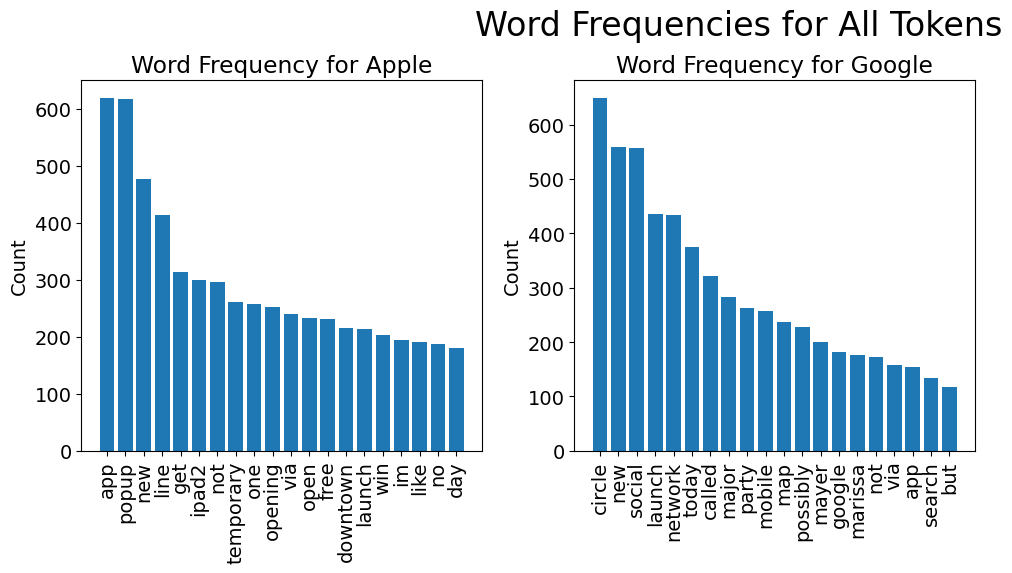

In [106]:
def setup_two_subplots():
    fig = plt.figure(figsize=(15,15))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(3, 6)
    ax1 = fig.add_subplot(gs[0, :2]) 
    ax2 = fig.add_subplot(gs[0, 2:4])
    
    return fig, [ax1, ax2,]

fig, axes = setup_two_subplots()

artnumberdict={'Apple':0,'Google':1,}

def plot_distribution_of_column_by_category(df, axes, title="Word Frequency for"):
    brand_most_common_words={}
    for key, value in artnumberdict.items():
        all_words=df[df["brand"] == key]['text'].explode()
        freq_dist = FreqDist(all_words)
        top_20 = list(zip(*freq_dist.most_common(20)))
        tokens = top_20[0]
        counts = top_20[1]
        ax=axes[value]
        ax.bar(tokens, counts)
        ax.set_title(f"{title} {key}")
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=90)
        plt.rcParams.update({'font.size':14})

plot_distribution_of_column_by_category(df, axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

#### Selecting the tweet_text column for further analysis 

In [ ]:
data = df[['tweet_text', 'sentiment']]
data

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0.0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1.0
2,@swonderlin Can not wait for #iPad 2 also. The...,0.0
3,@sxsw I hope this year's festival isn't as cra...,1.0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1.0
...,...,...
9088,Ipad everywhere. #SXSW {link},0.0
9089,"Wave, buzz... RT @mention We interrupt your re...",0.0
9090,"Google's Zeiger, a physician never reported po...",0.0
9091,Some Verizon iPhone customers complained their...,0.0


In [ ]:
data['sentiment'] = data['sentiment'].replace(4,1)

C:\Users\Bee\AppData\Local\Temp\ipykernel_11452\3637978030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(4,1)


In [ ]:
data['sentiment'].unique()

array([0., 1.])

#### Separating positive and negative tweets


In [ ]:
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]

#### Taking one-fourth of the data so that it can be computationally lightweight

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [ ]:
dataset = pd.concat([data_pos, data_neg])

#### Making tweet text in lower case

In [ ]:
dataset['tweet_text']=dataset['tweet_text'].str.lower()
dataset['tweet_text'].tail()

9088                        ipad everywhere. #sxsw {link}
9089    wave, buzz... rt @mention we interrupt your re...
9090    google's zeiger, a physician never reported po...
9091    some verizon iphone customers complained their...
9092    ï¡ïàü_êîò£áââ_£â_ûârt @...
Name: tweet_text, dtype: object

#### Managing stopwords

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'youve', 'your', 'yours', 'yourself', 'yourselves', '#sxsw', 'sxsw', 'sxswi', '#sxswi', 'rt', 'ipad', 'google', 'apple', 'iphone', 'amp',
             'android', 'sxswi', 'link', '#apple',
             '#google', ''...'', '\x89', '#ipad2',
             '0','1','2','3','4','5','6','7','8','9',
             '#iphone', '#android', 'store', 'austin', '#ipad']